---
title: "Introduction"
author: "phonchi"
date: "09/05/2022"
format: 
  html:
    toc: true
    code-line-numbers: true
    code-tools: true
---

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math524/blob/master/static_files/presentations/Chapter1_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math524/blob/master/static_files/presentations/Chapter1_Lab.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br/>

## Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns #Samuel Norman Seaborn
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

`Python` is a general-purpose language with statistics modules. When it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of `Python` is an invaluable asset

### Constructing data

One way to think a `Series` is regarded it as a labeled array.
Creating a `Series` by passing a list of values, letting pandas create a default integer *index*:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Since we did not specify an index for the data, a default one consisting of the integers `0` through `N - 1` (where `N` is the length of the data) is created. Often you'll want to create a Series with an index identifying each data point with a label:

In [3]:
s2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
s2

d    4
b    7
a   -5
c    3
dtype: int64

Another way to think about a `Series` is as a fixed-length, ordered dictionary, as it is a mapping of index values to data values.

In [4]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
s3 = pd.Series(sdata)
s3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

We will store and manipulate this data in a `pandas.DataFrame`, from the `pandas` module. It is the `Python` equivalent of the spreadsheet table. It is different from a `2D numpy` array as it has named columns, can contain a mixture of different data types by column, and has elaborate mechanisms. The `DataFrame` has both a row and column index.

In [5]:
dates = pd.date_range("20220101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-01-01,0.166868,2.444831,0.291433,1.426635
2022-01-02,1.002246,-0.027256,-0.383451,0.266056
2022-01-03,-0.544344,-1.092930,0.156811,-0.065610
2022-01-04,-0.042673,0.090997,-0.278790,1.249868
2022-01-05,0.940585,1.306884,1.229377,0.318209
2022-01-06,0.097427,1.118011,0.359106,0.616620


Creating from arrays: A `pandas.DataFrame` can also be seen as a dictionary of 1D `Series` that share the same index, eg arrays or lists. If we have 3 `numpy` arrays:

In [6]:
t = np.arange(10) #start from 0
sin_t = np.sin(t)
cos_t = np.cos(t)
df2 = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})
df2

,t,sin,cos
0,0,0.000000,1.000000
1,1,0.841471,0.540302
2,2,0.909297,-0.416147
3,3,0.141120,-0.989992
4,4,-0.756802,-0.653644
5,5,-0.958924,0.283662
6,6,-0.279415,0.960170
7,7,0.656987,0.753902
8,8,0.989358,-0.145500
9,9,0.412118,-0.911130


One of the most common is from a dictionary of equal-length lists or `NumPy` arrays:

In [7]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


The columns of the resulting `DataFrame` may have different `dtypes`.

In [8]:
df2.dtypes

t        int64
sin    float64
cos    float64
dtype: object

### Viewing data

In [9]:
s.array, s.index

(<PandasArray>
 [1.0, 3.0, 5.0, nan, 6.0, 8.0]
 Length: 6, dtype: float64, RangeIndex(start=0, stop=6, step=1))

In [10]:
df.head()

,A,B,C,D
2022-01-01,0.166868,2.444831,0.291433,1.426635
2022-01-02,1.002246,-0.027256,-0.383451,0.266056
2022-01-03,-0.544344,-1.092930,0.156811,-0.065610
2022-01-04,-0.042673,0.090997,-0.278790,1.249868
2022-01-05,0.940585,1.306884,1.229377,0.318209


In [11]:
df.tail(3)

,A,B,C,D
2022-01-04,-0.042673,0.090997,-0.278790,1.249868
2022-01-05,0.940585,1.306884,1.229377,0.318209
2022-01-06,0.097427,1.118011,0.359106,0.616620


In [12]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
df.values

array([[ 0.16686843,  2.44483123,  0.29143297,  1.42663542],
       [ 1.00224626, -0.02725596, -0.3834514 ,  0.26605642],
       [-0.54434398, -1.0929295 ,  0.15681066, -0.06560956],
       [-0.04267318,  0.09099718, -0.27878987,  1.24986756],
       [ 0.9405845 ,  1.30688362,  1.22937671,  0.31820881],
       [ 0.09742713,  1.11801138,  0.35910632,  0.6166202 ]])

`describe()` shows a quick statistic summary of your data:

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.270018,0.640090,0.229081,0.635296
std,0.597864,1.239381,0.576149,0.588628
min,-0.544344,-1.092930,-0.383451,-0.065610
25%,-0.007648,0.002307,-0.169890,0.279095
50%,0.132148,0.604504,0.224122,0.467415
75%,0.747155,1.259666,0.342188,1.091556
max,1.002246,2.444831,1.229377,1.426635


Sorting by an axis:

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-01,1.426635,0.291433,2.444831,0.166868
2022-01-02,0.266056,-0.383451,-0.027256,1.002246
2022-01-03,-0.065610,0.156811,-1.092930,-0.544344
2022-01-04,1.249868,-0.278790,0.090997,-0.042673
2022-01-05,0.318209,1.229377,1.306884,0.940585
2022-01-06,0.616620,0.359106,1.118011,0.097427


Sorting by values:

In [17]:
df.sort_values(by="B")

,A,B,C,D
2022-01-03,-0.544344,-1.092930,0.156811,-0.065610
2022-01-02,1.002246,-0.027256,-0.383451,0.266056
2022-01-04,-0.042673,0.090997,-0.278790,1.249868
2022-01-06,0.097427,1.118011,0.359106,0.616620
2022-01-05,0.940585,1.306884,1.229377,0.318209
2022-01-01,0.166868,2.444831,0.291433,1.426635


### Selecting data

Selecting a single column, which yields a `Series`, equivalent to `df.A`:

In [18]:
df["A"]

2022-01-01    0.166868
2022-01-02    1.002246
2022-01-03   -0.544344
2022-01-04   -0.042673
2022-01-05    0.940585
2022-01-06    0.097427
Freq: D, Name: A, dtype: float64

In [19]:
df[0:3] #Selecting via [], which slices the rows. df["20210101":"20210103"] also works

,A,B,C,D
2022-01-01,0.166868,2.444831,0.291433,1.426635
2022-01-02,1.002246,-0.027256,-0.383451,0.266056
2022-01-03,-0.544344,-1.092930,0.156811,-0.065610


Selection by labels of columns or rows (loc)

In [20]:
df.loc[:, ["A", "B"]]  

,A,B
2022-01-01,0.166868,2.444831
2022-01-02,1.002246,-0.027256
2022-01-03,-0.544344,-1.092930
2022-01-04,-0.042673,0.090997
2022-01-05,0.940585,1.306884
2022-01-06,0.097427,1.118011


In [21]:
df.loc["20220101":"20220104","A":"C"]

,A,B,C
2022-01-01,0.166868,2.444831,0.291433
2022-01-02,1.002246,-0.027256,-0.383451
2022-01-03,-0.544344,-1.092930,0.156811
2022-01-04,-0.042673,0.090997,-0.278790


Selection by position (Simiar to `NumPy` and `Python`)

In [22]:
df.iloc[3]

A   -0.042673
B    0.090997
C   -0.278790
D    1.249868
Name: 2022-01-04 00:00:00, dtype: float64

In [23]:
df.iloc[3:5, 0:2]

,A,B
2022-01-04,-0.042673,0.090997
2022-01-05,0.940585,1.306884


Boolean indexing

In [24]:
df[df["A"] > 0]

,A,B,C,D
2022-01-01,0.166868,2.444831,0.291433,1.426635
2022-01-02,1.002246,-0.027256,-0.383451,0.266056
2022-01-05,0.940585,1.306884,1.229377,0.318209
2022-01-06,0.097427,1.118011,0.359106,0.616620


Setting and adding data

In [25]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2022-01-01,0.166868,2.444831,0.291433,1.426635,one
2022-01-02,1.002246,-0.027256,-0.383451,0.266056,one
2022-01-03,-0.544344,-1.092930,0.156811,-0.065610,two
2022-01-04,-0.042673,0.090997,-0.278790,1.249868,three
2022-01-05,0.940585,1.306884,1.229377,0.318209,four
2022-01-06,0.097427,1.118011,0.359106,0.616620,three


An important method on pandas objects is `reindex`, which means to create a new object with the values rearranged to align with the new index.

In [26]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [27]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"]) # Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
obj2  #pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. Check dropna(), fillna() and isna()

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

### Computation about data

In [28]:
df.mean()

A    0.270018
B    0.640090
C    0.229081
D    0.635296
dtype: float64

In [29]:
df.apply(np.cumsum)

,A,B,C,D
2022-01-01,0.166868,2.444831,0.291433,1.426635
2022-01-02,1.169115,2.417575,-0.092018,1.692692
2022-01-03,0.624771,1.324646,0.064792,1.627082
2022-01-04,0.582098,1.415643,-0.213998,2.876950
2022-01-05,1.522682,2.722527,1.015379,3.195159
2022-01-06,1.620109,3.840538,1.374485,3.811779


### Merge and Group data

In [30]:
pieces = [df[:2], df[2:4], df[4:]]
pieces, type(pieces[0])

([                   A         B         C         D
  2022-01-01  0.166868  2.444831  0.291433  1.426635
  2022-01-02  1.002246 -0.027256 -0.383451  0.266056,
                     A         B         C         D
  2022-01-03 -0.544344 -1.092930  0.156811 -0.065610
  2022-01-04 -0.042673  0.090997 -0.278790  1.249868,
                     A         B         C         D
  2022-01-05  0.940585  1.306884  1.229377  0.318209
  2022-01-06  0.097427  1.118011  0.359106  0.616620],
 pandas.core.frame.DataFrame)

In [31]:
pd.concat(pieces) #Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive.

,A,B,C,D
2022-01-01,0.166868,2.444831,0.291433,1.426635
2022-01-02,1.002246,-0.027256,-0.383451,0.266056
2022-01-03,-0.544344,-1.092930,0.156811,-0.065610
2022-01-04,-0.042673,0.090997,-0.278790,1.249868
2022-01-05,0.940585,1.306884,1.229377,0.318209
2022-01-06,0.097427,1.118011,0.359106,0.616620


In [32]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-2.072404,0.308518
1,bar,one,-0.786539,0.875751
2,foo,two,0.544077,1.649226
3,bar,three,-0.276529,-0.998452
4,foo,two,-1.575059,0.129585
5,bar,two,1.484244,0.783970
6,foo,one,0.266894,1.922994
7,foo,three,-1.590179,0.378632


In [33]:
df.groupby("A").sum()

,C,D
A,,
bar,0.421177,0.661268
foo,-4.426670,4.388955


### I/O

In [34]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [35]:
df.to_csv("foo.csv")

For more information, refer to https://wesmckinney.com/book/pandas-basics.html and https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Seaborn

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

The "tips" dataset https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

In [36]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Scatterplot

The scatter plot is a mainstay of statistical visualization. It depicts the **joint distribution of two variables** using a cloud of points, where each point represents an observation in the dataset. 

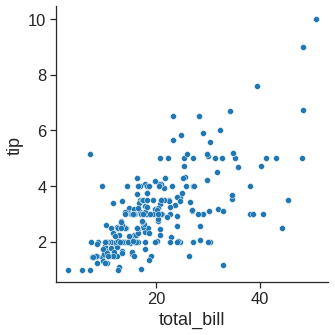

In [37]:
# Scatterplot
sns.relplot(x="total_bill", y="tip", data=tips) 

While the points are plotted in two dimensions, another dimension can be added to the plot by conditioning a third variable. In `seaborn`, this is referred to as using a “hue/styple/size semantic”, because the color/style/size of the point gains meaning:

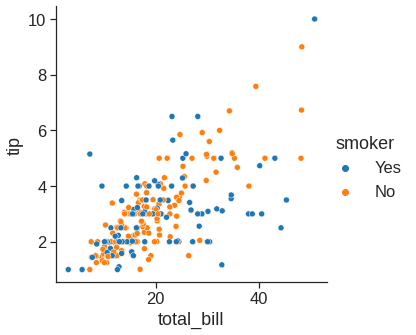

In [38]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips) 

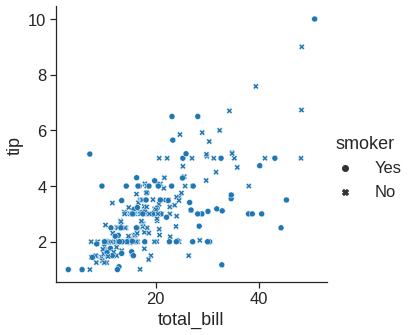

In [39]:
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips) # you can use a different marker style for each class

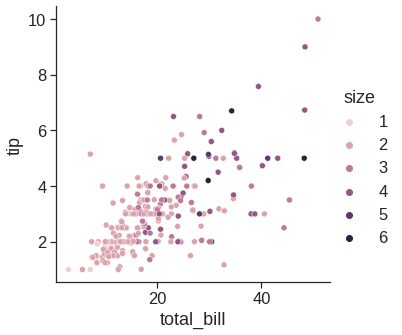

In [40]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips) #if hue is numeric rather than categorical

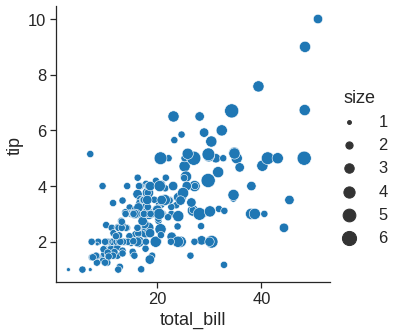

In [41]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips) #size rather than colors

Note that we can plot small multiples by using row and col variable

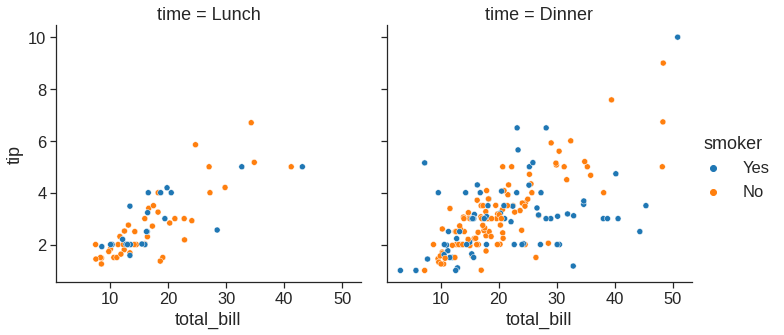

In [42]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips) #show in different subplot

### Lineplot

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot to **emphasize the continuity**.

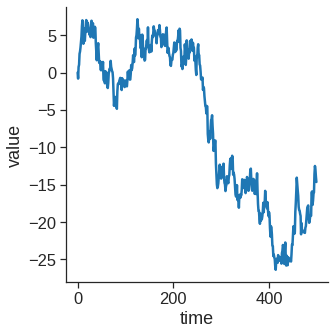

In [43]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean by bootstraping:

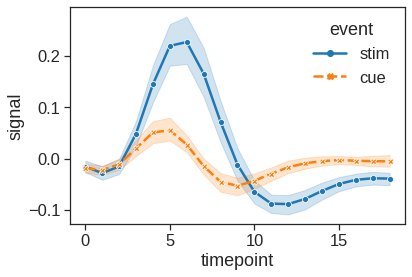

In [44]:
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", markers=True, data=fmri)

### Histplot

An early step in any effort to analyze or model data should be to understand **how the variables are distributed**. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

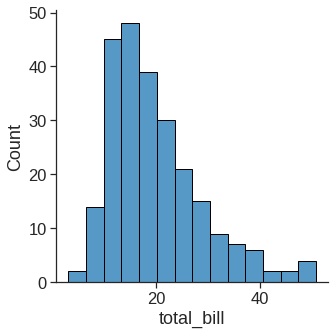

In [45]:
sns.displot(x="total_bill", data = tips) #check parameter bins and binwidth

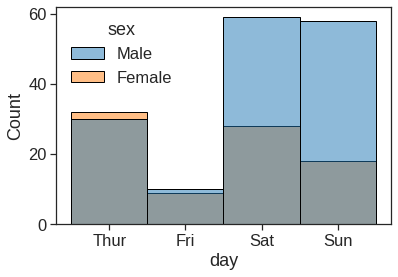

In [46]:
sns.histplot(x="day", hue="sex", data=tips) #By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish.

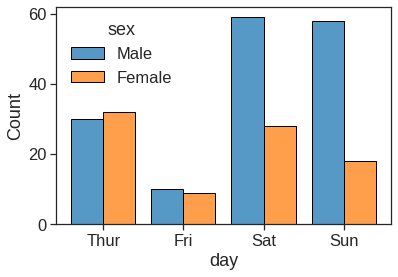

In [47]:
sns.histplot(x="day", hue="sex", multiple="dodge", shrink=.8, data=tips)

### Kdeplot

Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

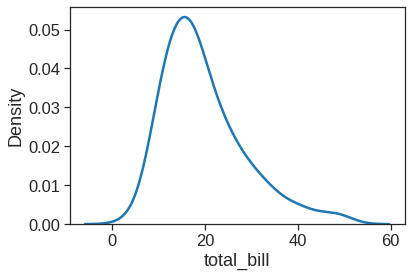

In [48]:
sns.kdeplot(x="total_bill", data=tips)

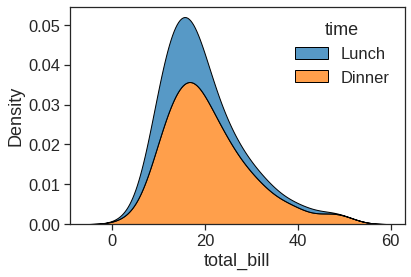

In [49]:
sns.kdeplot(x="total_bill", hue="time", multiple="stack", data=tips)

### Joinplot

`jointplot()` augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, `jointplot()` represents the bivariate distribution using `scatterplot()` and the marginal distributions using `histplot()`:

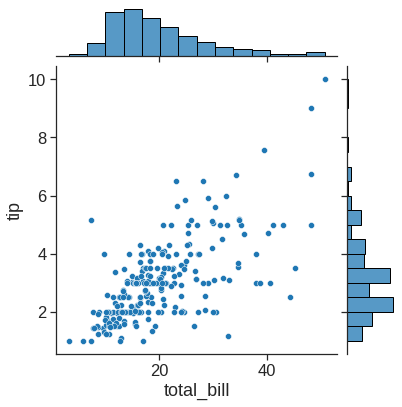

In [50]:
sns.jointplot(x="total_bill", y="tip", data=tips) 

### Pairpolt

The `pairplot()` function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, `pairplot()` uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

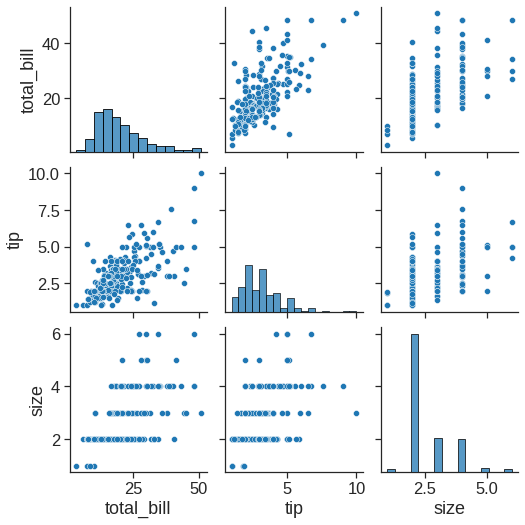

In [51]:
sns.pairplot(tips)

### Boxplot

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the **distribution** of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

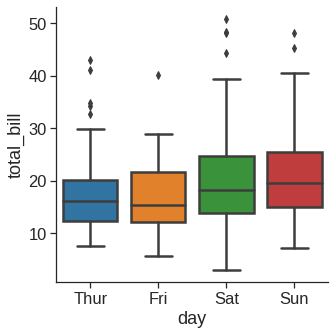

In [52]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

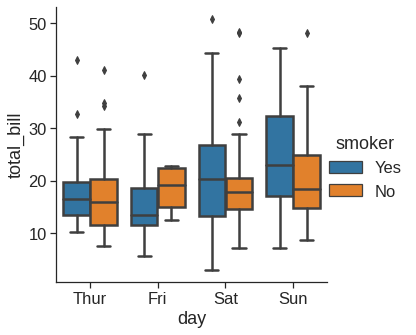

In [53]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips) # When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap

### Barplot

Rather than showing the distribution within each category, you might want to show an estimate of the **central tendency** of the values. In seaborn, the `barplot()` function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

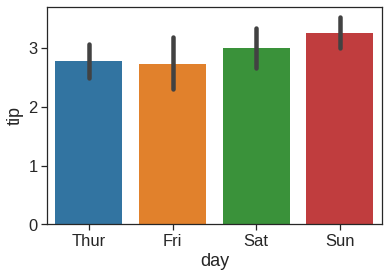

In [54]:
ax = sns.barplot(x="day", y="tip", data=tips)

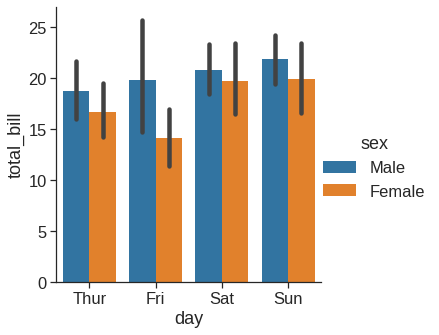

In [55]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", data=tips)

### Countplot

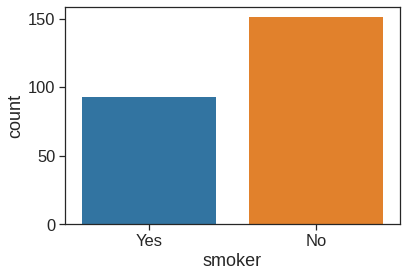

In [56]:
sns.countplot(x="smoker", data=tips) #simply count the number

### Pointplot

This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the **point estimate** and confidence interval

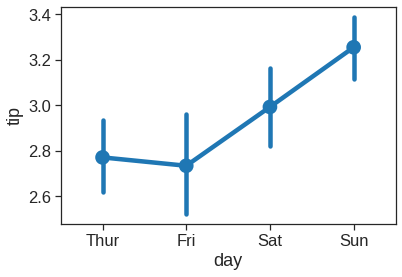

In [57]:
sns.pointplot(x="day", y="tip", data=tips, ci=68)

### Regplot/lmplot
In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. The goal of `seaborn`, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

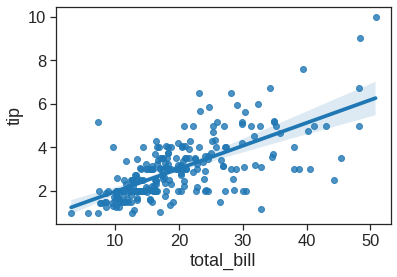

In [58]:
sns.regplot(x="total_bill", y="tip", data=tips)

When the y variable is binary, simple linear regression also “works” but provides implausible predictions. The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

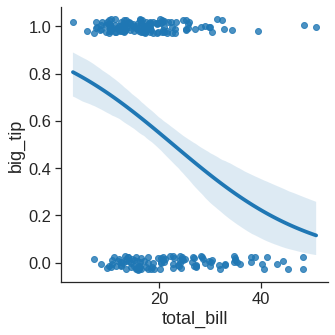

In [59]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

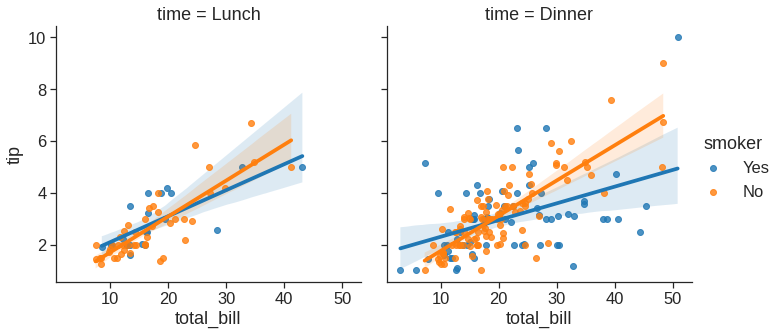

In [60]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

### Heatmap

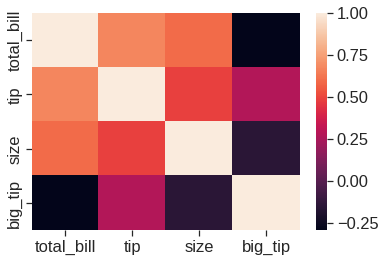

In [61]:
corr = tips.corr()
sns.heatmap(corr)

Customized your plot https://seaborn.pydata.org/tutorial/axis_grids.html. For more information, see https://seaborn.pydata.org/tutorial.html

## Lab1: Loading Datasets and processing

<center><img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="70%" height="70%"></center>

<div align="center"> source: https://stackoverflow.com/questions/2354725/what-exactly-is-llvm </div>

Datasets available on [https://www.statlearning.com/resources-second-edition](https://www.statlearning.com/resources-second-edition)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
Wage = pd.read_csv('/content/drive/MyDrive/Lab/Data/Wage.csv')
Wage.head(3)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [64]:
Wage.shape, Wage.columns

((3000, 11),
 Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
        'health', 'health_ins', 'logwage', 'wage'],
       dtype='object'))

In [65]:
Wage.info(), Wage.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


(None,               year          age      logwage         wage
 count  3000.000000  3000.000000  3000.000000  3000.000000
 mean   2005.791000    42.414667     4.653905   111.703608
 std       2.026167    11.542406     0.351753    41.728595
 min    2003.000000    18.000000     3.000000    20.085537
 25%    2004.000000    33.750000     4.447158    85.383940
 50%    2006.000000    42.000000     4.653213   104.921507
 75%    2008.000000    51.000000     4.857332   128.680488
 max    2009.000000    80.000000     5.763128   318.342430)

In [66]:
Wage[Wage['year'] == 2004]['wage'].mean()

111.15999687022257

In [67]:
groupby_year = Wage.groupby('year')
for year, value in groupby_year['wage']:
    print((year, value.mean()))

(2003, 106.1982838253092)
(2004, 111.15999687022257)
(2005, 110.03785731274047)
(2006, 114.24257930246814)
(2007, 112.89455609045216)
(2008, 113.55199949510215)
(2009, 115.97177059231909)


In [68]:
groupby_year # groupby_year is a powerful object that exposes many operations on the resulting group of dataframes:

`Seaborn` combines simple statistical fits with plotting on `Pandas` dataframes.

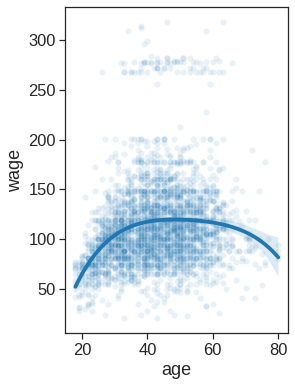

In [69]:
# creating plots
# Scatter plot with polynomial regression line, the regression line is bounded by the data limits. truncate=True.
plt.figure(figsize=(4,6))
sns.scatterplot(x="age", y="wage", data=Wage, alpha=0.1)
sns.regplot(x="age", y="wage", data=Wage, order=4, truncate=True, scatter=False) 

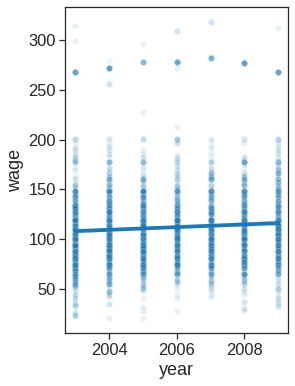

In [70]:
# creating plots
# Scatter plot with polynomial regression line
plt.figure(figsize=(4,6))
sns.scatterplot(x="year", y="wage", data=Wage, alpha=0.1)
sns.regplot(x="year", y="wage", data=Wage, order=1, truncate=True, scatter=False)

In [71]:
print(Wage.education.unique())
originalL = list(Wage.education.unique())
orderL = [originalL[0], originalL[3], originalL[2], originalL[1], originalL[4]]

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

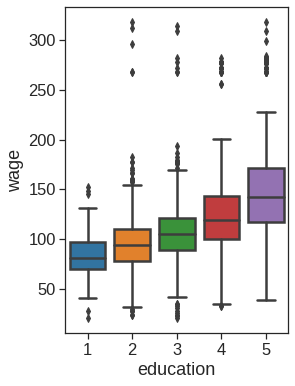

In [72]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="education", y="wage", data=Wage, order=orderL)
ax.set_xticklabels([t.get_text().split()[0][0]  for t in ax.get_xticklabels()])

In [73]:
Smarket = pd.read_csv('/content/drive/MyDrive/Lab/Data/Smarket.csv')
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Text(0.5, 1.0, 'Yesterday')

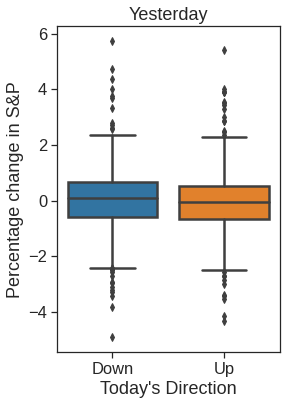

In [74]:
plt.figure(figsize=(4,6))
ax =sns.boxplot(x="Direction", y="Lag1", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Yesterday")

Text(0.5, 1.0, 'Two Days Previois')

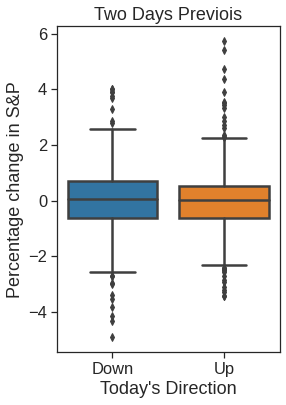

In [75]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag2", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Two Days Previois")

Text(0.5, 1.0, 'Three Days Previois')

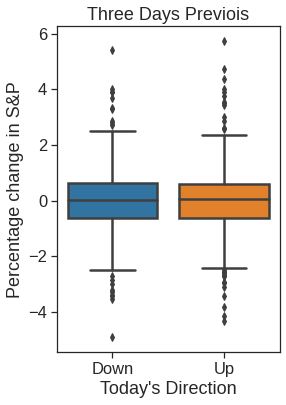

In [76]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x="Direction", y="Lag3", data=Smarket, order=["Down", "Up"])
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.title("Three Days Previois")

In [77]:
Smarket = pd.read_csv('/content/drive/MyDrive/Lab/Data/Smarket.csv', index_col=0) #use col0 as index

In [78]:
Smarket.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [79]:
Smarket.loc[:'2004'][['Lag1','Lag2']]

,Lag1,Lag2
Year,,
2001,0.381,-0.192
2001,0.959,0.381
2001,1.032,0.959
2001,-0.623,1.032
2001,0.614,-0.623
...,...,...
2004,0.046,0.342
2004,-0.431,0.046
2004,0.715,-0.431


In [80]:
X_train = Smarket.loc[:'2004'][['Lag1','Lag2']]
y_train = Smarket.loc[:'2004']['Direction']

X_test = Smarket.loc['2005':][['Lag1','Lag2']]
y_test = Smarket.loc['2005':]['Direction']

In [81]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict_proba(X_test)

In [82]:
qda.classes_

array(['Down', 'Up'], dtype=object)

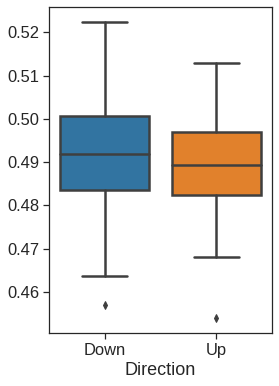

In [83]:
plt.figure(figsize=(4,6))
sns.boxplot(x=y_test, y=pred[:,0]) #predicted probability for decrease

In [84]:
NCI60 = pd.read_csv('/content/drive/MyDrive/Lab/Data/NCI60_data.csv')
NCI60.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [85]:
NCI60 = pd.read_csv('/content/drive/MyDrive/Lab/Data/NCI60_data.csv').drop('Unnamed: 0', axis=1)
NCI60.columns = np.arange(NCI60.columns.size)
NCI60.head()

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [86]:
X = pd.DataFrame(scale(NCI60))
X.shape

(64, 6830)

In [87]:
y = pd.read_csv('/content/drive/MyDrive/Lab/Data/NCI60_labs.csv', usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [88]:
y.type.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: type, dtype: int64

In [89]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
NCI60_plot = pd.DataFrame(pca2.fit_transform(X))

Text(0, 0.5, 'Z3')

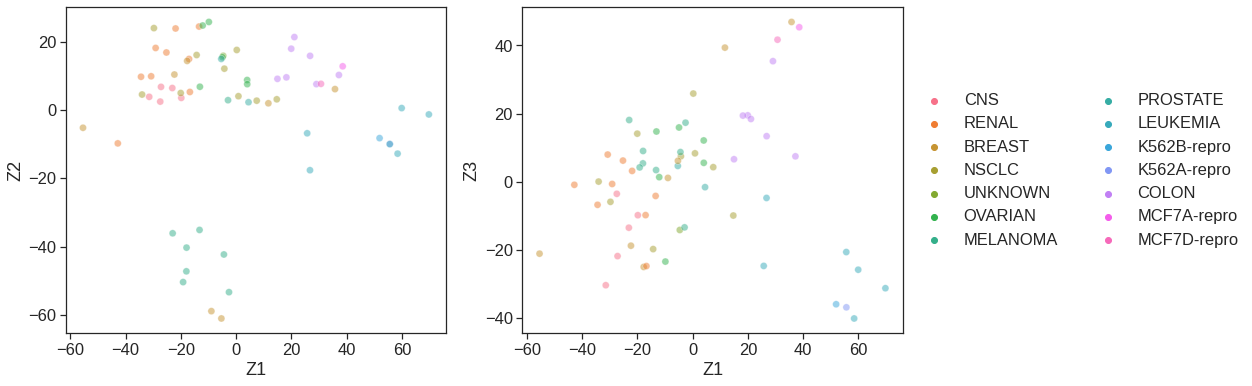

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# Left plot
sns.scatterplot(x =0, y=-NCI60_plot[1], data=NCI60_plot, hue=y.type, alpha=0.5, s=50, ax=ax1, legend=False)
ax1.set_xlabel('Z1') 
ax1.set_ylabel('Z2')
   

# Right plot
sns.scatterplot(x = 0, y= 2, data=NCI60_plot, hue=y.type, alpha=0.5, s=50, ax=ax2)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax2.set_xlabel('Z1')  
ax2.set_ylabel('Z3')